In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob


In [19]:
videos = pd.read_csv('CBVIDEOS.csv',encoding='utf8',error_bad_lines = False);
comm = pd.read_csv('Comments Dataset 3 - Sheet1.csv',encoding='utf8',error_bad_lines=False);

In [20]:
pol=[] # list which will contain the polarity of the comments
for i in comm.comment_text.values:
    try:
        analysis =TextBlob(i)
        pol.append(analysis.sentiment.polarity)
        
    except:
        pol.append(0)

In [21]:
comm['pol']=pol

comm['pol'][comm.pol==0]= 0

comm['pol'][comm.pol > 0]= 1
comm['pol'][comm.pol < 0]= -1

<ipython-input-21-4d6da047354a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol==0]= 0
<ipython-input-21-4d6da047354a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol > 0]= 1
<ipython-input-21-4d6da047354a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm['pol'][comm.pol < 0]= -1


In [22]:
df_positive = comm[comm.pol==1]
df_positive.head()

,video_id,comment_text,likes,replies,pol
1,vFKwhbBVt78,God loves you so much that He sent His Holy S...,0.0,0.0,1.0
3,vFKwhbBVt78,First time here,0.0,0.0,1.0
4,vFKwhbBVt78,First time here,0.0,0.0,1.0
5,vFKwhbBVt78,Good video but the thumbnail was kind of decei...,1.0,0.0,1.0
13,vFKwhbBVt78,"Actually, the vaquita is the most endangered, ...",0.0,0.0,1.0


(-0.5, 999.5, 499.5, -0.5)

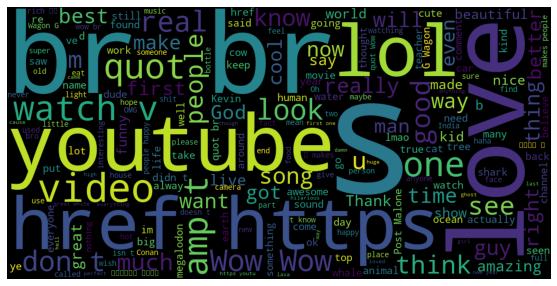

In [23]:
k= (' '.join(df_positive['comment_text']))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(0.0, 1.0, 0.0, 1.0)

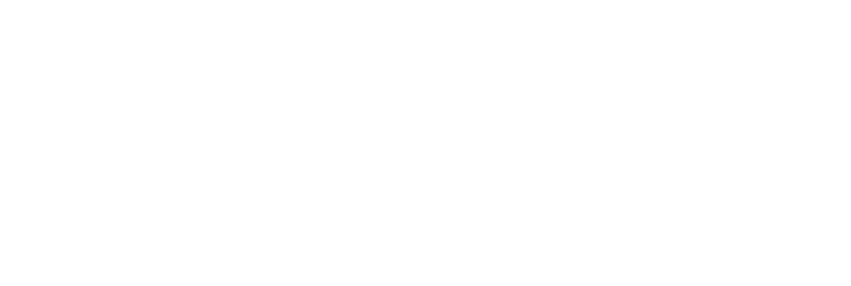

In [24]:
df_negative = comm[comm.pol==-1]
k= (' '.join(df_negative['comment_text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))

plt.axis('off')

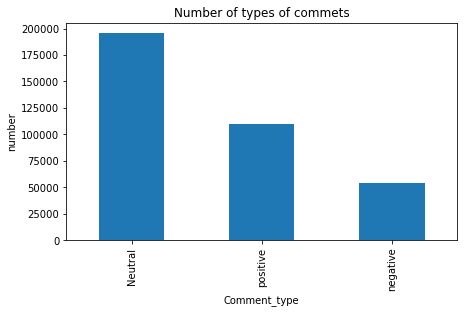

In [25]:
comm['pol'].replace({1:'positive',0:'Neutral',-1:'negative'}).value_counts().plot(kind='bar',figsize=(7,4));
plt.title('Number of types of commets');
plt.xlabel('Comment_type');
plt.ylabel('number');

In [26]:
id=[]
pos_comm=[]
neg_comm=[]
neutral_comm =[]
for i in set(comm.video_id):
    id.append(i)
    try:
        pos_comm.append(comm[comm.video_id==i].pol.value_counts()[1])
    except:
        pos_comm.append(0)
    try:    
        neg_comm.append(comm[comm.video_id==i].pol.value_counts()[-1])
    except:
        neg_comm.append(0)
    try:    
        neutral_comm.append(comm[comm.video_id==i].pol.value_counts()[0])
    except:
        neutral_comm.append(0)

In [27]:
df_unique = pd.DataFrame(id)
df_unique.columns=['id']
df_unique['pos_comm'] =pos_comm
df_unique['neg_comm'] = neg_comm
df_unique['neutral_comm'] = neutral_comm
df_unique['total_comments']=df_unique['pos_comm']+df_unique['neg_comm']+df_unique['neutral_comm']
df_unique.head(6)

,id,pos_comm,neg_comm,neutral_comm,total_comments
0,KI5G6pvhoOA,163,102,1236,1501
1,oOf-44xhbnU,1374,1068,1376,3818
2,4U_l8WoaWks,1176,535,1513,3224
3,210ZoXTl_e4,509,342,668,1519
4,wUQyHA-JHTE,2014,1256,1671,4941
5,UdxmtfU-qvII,0,0,1,1


In [28]:
df_unique.to_csv('unique.csv',index=False,)

In [29]:
videos.head()

,title,video_id,tags,views,likes,comment_total,category_id
0,These Are 10 Rarest Animals on this Planet,vFKwhbBVt78,"""top"",\r\n ""10"",\r\n ""viralbe"",\...",427350.0,6266.0,254.0,15.0
1,10 Rarest Animals Found On Earth!,oFoZG2n3_ME,"""world list"",\r\n ""rarest animals found...",110509.0,2065.0,150.0,27.0
2,15 Amazing Hybrid Animals That Actually Exist,twGnn8niQYE,"""rare animals"",\r\n ""hybrid animals"",\r...",4385514.0,73387.0,2979.0,10.0
3,15 Wild Animals That Have Rarely Ever Been Seen,MrdOcnW4B2M,"""animals"",\r\n ""wildlife"",\r\n ""...",5290516.0,80604.0,4130.0,10.0
4,Unusual People Born with The Rarest Skin Color,NFDTcARfm80,"""people"",\r\n ""facts"",\r\n ""Fact...",5182028.0,87595.0,3395.0,27.0
